In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pickle
from funciones import *
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import json
import unicodedata
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 3200)

In [2]:
data_aprobada = pd.read_csv('data_procesada_modelo.csv')
del data_aprobada['Unnamed: 0']
data_aprobada.head()

CLIENTE  mes_inicio  Default30  Default60  Default90  Default_R  \
0      14052  2019-03-01          1          1          1          0   
1  200111260  2018-05-01          1          1          1          0   
2  200194137  2018-01-01          1          1          1          0   
3  200202823  2017-06-01          1          1          1          0   
4  200202823  2019-03-01          1          1          1          0   

  Operacion_codificada  ingreso         segmento Descripcion_Nivel_Educacion  \
0     5536XXXXXXXX1005      NaN              NaN               Universitario   
1     5161XXXXXXXX4022      0.0              NaN               Universitario   
2     5457XXXXXXXX7005      NaN              NaN               Universitario   
3         3260XXXX1199      NaN              NaN             Sin Escolaridad   
4         3260XXXX7065   5000.0  LOCAL RETAIL?MA             Sin Escolaridad   

   ...  ciudad DIAS_MORA_UM  DIAS_MORA_U3M SALDO_PAS_UM SALDO_TDC_UM  \
0  ...  Panama          0.0            0.0          NaN      1806.87   
1  ...  Panama          0.0            0.0    517658.33      4173.95   
2  ...  Panama          0.0            0.0          NaN      9101.25   
3  ...  Panama          0.0            0.0     64156.01       103.21   
4  ...  Panama          0.0            0.0     29122.33          NaN   

  SALDO_CONS_UM SALDO_HIPO_UM SALDO_AUTO_UM       edad  antiguedad_empleo  
0           NaN           NaN           NaN  48.320548                NaN  
1     130027.61     212845.43           NaN  40.783562                NaN  
2           NaN           NaN           NaN  60.531507           2.917808  
3           NaN           NaN           NaN  50.967123                NaN  
4       1427.34           NaN           NaN  52.715068                NaN  

[5 rows x 34 columns]

In [3]:
len(data_aprobada)

3341

In [4]:
df = data_aprobada.drop_duplicates(subset=['Operacion_codificada', 'CLIENTE'])
len(df)

3341

In [5]:
len(data_aprobada['Operacion_codificada'].unique())

2052

In [6]:
data_aprobada['SubTipoCliente'].value_counts()

Cliente Regular    3109
-                   227
Global                5
Name: SubTipoCliente, dtype: int64

In [7]:
data_aprobada['segmento'].value_counts()

LOCAL RETAIL?MA                        76
MASIVO LOCAL                           13
LOCAL PREMIUM?P                         6
INTERNATIONAL P                         1
BANESCO EMPLOYE                         1
PREMIUM LOCAL                           1
Name: segmento, dtype: int64

In [8]:
len(data_aprobada)

3341

In [3]:
variables_buro = pd.read_excel('apc.xlsx')
del variables_buro['mes_inicio']
variables_buro.head(20)

CLIENTE Operacion_codificada  score  max_dias_atraso  prom_saldo_actual  \
0       14052     5536XXXXXXXX1005    NaN              NaN                NaN   
1   200111260     5161XXXXXXXX4022    NaN              0.0      158760.685000   
2   200194137     5457XXXXXXXX7005    NaN              NaN                NaN   
3   200202823           1020XXX343  803.0              0.0       56019.170000   
4   200202823         3260XXXX1199  803.0              0.0       56019.170000   
5   200202823         3260XXXX7065  803.0              0.0       56019.170000   
6   201421604     5270XXXXXXXX0001    NaN              NaN                NaN   
7   201421604     5536XXXXXXXX6008    NaN              NaN                NaN   
8   201476823     5161XXXXXXXX6008    NaN              NaN                NaN   
9   201604443     5536XXXXXXXX3018    NaN              NaN                NaN   
10  201894919         3260XXXX0617  766.0              0.0      110103.695556   
11  201894919     4466XXXXXXXX2003  766.0              0.0      110103.695556   
12  201894919     5161XXXXXXXX0009  766.0              0.0      110103.695556   
13  201955981         3260XXXX2667  799.0              0.0       51066.732857   
14  201955981     5161XXXXXXXX4007  799.0              0.0       51066.732857   
15  201955981     5436XXXXXXXX7002  799.0              0.0       51066.732857   
16  202815936     5161XXXXXXXX0009    NaN              NaN                NaN   
17  202815936     5270XXXXXXXX7007    NaN              NaN                NaN   
18  202909805     5457XXXXXXXX0004    NaN              NaN                NaN   
19  204018404     4466XXXXXXXX2006  582.0              0.0       25322.953333   

    monto_cuotas  
0            NaN  
1        3456.18  
2            NaN  
3        7348.41  
4        7348.41  
5        7348.41  
6            NaN  
7            NaN  
8            NaN  
9            NaN  
10       6449.35  
11       6449.35  
12       6449.35  
13       2484.64  
14       2484.64  
15       2484.64  
16           NaN  
17           NaN  
18           NaN  
19        730.25

In [20]:
data_aprobada[['CLIENTEx','Operacion_codificadax','score','max_dias_atraso','prom_saldo_actual','monto_cuotas']] = variables_buro

In [21]:
data_aprobada['CLIENTE'].to_list() == data_aprobada['CLIENTEx'].to_list()

True

In [22]:
data_aprobada['Operacion_codificada'] == data_aprobada['Operacion_codificadax']

0        True
1        True
2        True
3       False
4       False
5       False
6       False
7       False
8        True
9        True
10       True
11       True
12       True
13      False
14      False
15      False
16      False
17      False
18       True
19       True
20      False
21      False
22       True
23      False
24      False
25       True
26       True
27       True
28       True
29       True
30      False
31       True
32      False
33      False
34      False
35       True
36       True
37       True
38       True
39       True
40       True
41      False
42      False
43       True
44       True
45      False
46      False
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54      False
55      False
56       True
57       True
58       True
59       True
60      False
61      False
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69      False
70      False
71    

In [23]:
len(data_aprobada) - data_aprobada.isna().sum()

CLIENTE                        3341
mes_inicio                     3341
Default30                      3341
Default60                      3341
Default90                      3341
Default_R                      3341
Operacion_codificada           3341
ingreso                         805
segmento                         98
Descripcion_Nivel_Educacion    3341
Estadocivil                    3341
Genero                         3341
cantidad_Dependientes          3341
Cargo                          3341
DescripcionIndustria           3341
DescripcionSector              3341
TiempoRelacionBanco            3341
SubTipoCliente                 3341
FechaNacimiento                3341
Imgreso_DIMCLIENTES            3341
IngresoMensual                 3341
FechaEmpleoActual              3341
pais                           3341
provincia                      3341
ciudad                         3341
DIAS_MORA_UM                   1798
DIAS_MORA_U3M                  1873
SALDO_PAS_UM                

In [24]:
del data_aprobada['CLIENTEx']
del data_aprobada['Operacion_codificadax']

In [25]:
len(variables_buro)

3341

In [26]:
len(variables_buro['Operacion_codificada'].unique())

2052

In [27]:
#variables_buro['mes_inicio'] =variables_buro['mes_consulta'].apply(lambda x: x+'-01')

#date_format = '%Y-%m'
#variables_buro['mes_inicio'] =variables_buro['mes_consulta'].apply(lambda x: datetime.strptime(str(x),date_format).date())
#variables_buro['mes_inicio'] = variables_buro['mes_inicio'] #- relativedelta(months=1)
#variables_buro.mes_inicio = variables_buro.mes_inicio.astype(str) 

#del variables_buro['mes_consulta']

In [28]:
'''variables_buro['mes_inicio'] =variables_buro['mes_consulta'].apply(lambda x: x+'-01')
del variables_buro['mes_consulta']
variables_buro = variables_buro.drop_duplicates(['CLIENTE','mes_inicio']).reset_index(drop=True)


data_aprobada = data_aprobada.merge(variables_buro, on=['CLIENTE','mes_inicio'], how='left')'''

"variables_buro['mes_inicio'] =variables_buro['mes_consulta'].apply(lambda x: x+'-01')\ndel variables_buro['mes_consulta']\nvariables_buro = variables_buro.drop_duplicates(['CLIENTE','mes_inicio']).reset_index(drop=True)\n\n\ndata_aprobada = data_aprobada.merge(variables_buro, on=['CLIENTE','mes_inicio'], how='left')"

In [29]:
'''variables_buro['mes_consulta'] =variables_buro['mes_consulta'].apply(lambda x: x+'-01')
variables_buro = variables_buro.sort_values('mes_consulta',ascending=False).reset_index(drop=True)

operaciones = data_aprobada[['CLIENTE','mes_inicio']]
operaciones_buro = operaciones.merge(variables_buro, on=['CLIENTE'], how='left')
operaciones_buro = operaciones_buro.drop_duplicates(['CLIENTE','mes_inicio']).reset_index(drop=True)
operaciones_buro = operaciones_buro[operaciones_buro['mes_inicio'] >= operaciones_buro['mes_consulta']]
del operaciones_buro['mes_consulta']

data_aprobada = data_aprobada.merge(operaciones_buro, on=['CLIENTE','mes_inicio'], how='left')'''

"variables_buro['mes_consulta'] =variables_buro['mes_consulta'].apply(lambda x: x+'-01')\nvariables_buro = variables_buro.sort_values('mes_consulta',ascending=False).reset_index(drop=True)\n\noperaciones = data_aprobada[['CLIENTE','mes_inicio']]\noperaciones_buro = operaciones.merge(variables_buro, on=['CLIENTE'], how='left')\noperaciones_buro = operaciones_buro.drop_duplicates(['CLIENTE','mes_inicio']).reset_index(drop=True)\noperaciones_buro = operaciones_buro[operaciones_buro['mes_inicio'] >= operaciones_buro['mes_consulta']]\ndel operaciones_buro['mes_consulta']\n\ndata_aprobada = data_aprobada.merge(operaciones_buro, on=['CLIENTE','mes_inicio'], how='left')"

In [30]:
#date_format = '%Y-%m'
#base_objetivo['mes_inicio'] = base_objetivo.mes_inicio.apply(lambda x: datetime.strptime(str(x),date_format).date())
#base_objetivo.mes_inicio = base_objetivo.mes_inicio.astype(str) 

In [31]:
#data_aprobada[data_aprobada['mes_inicio'] > data_aprobada['mes_consulta']]

In [32]:
len(data_aprobada)

3341

In [33]:
#data_aprobada.to_csv('data_aprobada_ban_uni.csv')

In [34]:
data_aprobada[data_aprobada['score'].notnull()].score

3       803.0
4       803.0
5       803.0
10      766.0
11      766.0
12      766.0
13      799.0
14      799.0
15      799.0
19      582.0
36      800.0
38      738.0
43      799.0
47      751.0
48      786.0
49      786.0
50      803.0
51      671.0
52      671.0
59      604.0
60      510.0
61      510.0
64      786.0
65      786.0
69      852.0
70      852.0
71      680.0
75      475.0
76      703.0
77      784.0
83      728.0
88      818.0
89      818.0
92      759.0
93      759.0
94      759.0
100     755.0
101     644.0
104     734.0
105     705.0
106     705.0
107     705.0
108     705.0
112     822.0
113     822.0
115     713.0
121     650.0
122     650.0
123     639.0
125     584.0
126     584.0
127     695.0
129     745.0
132     544.0
147     516.0
148     516.0
150     672.0
152     369.0
157     603.0
158     603.0
167     765.0
168     613.0
169     613.0
172     792.0
173     792.0
186     820.0
187     820.0
191     814.0
193     815.0
194     560.0
195     560.0
197   

In [35]:
#data_aprobada.loc[751,'score'][:-2]

In [36]:
#data_aprobada['min_score'] = data_aprobada['min_score'].astype(str)
#data_aprobada['min_score'] = data_aprobada['min_score'].apply(lambda x: x[:-2])

In [37]:
#data_aprobada['min_score'] = data_aprobada.min_score.replace('   ',np.nan)
#data_aprobada['min_score'] = data_aprobada.min_score.replace('n',np.nan)

#data_aprobada['min_score'] = data_aprobada['min_score'].astype(float)

In [38]:
data_aprobada.score.unique()

array([ nan, 803., 766., 799., 582., 800., 738., 751., 786., 671., 604.,
       510., 852., 680., 475., 703., 784., 728., 818., 759., 755., 644.,
       734., 705., 822., 713., 650., 639., 584., 695., 745., 544., 516.,
       672., 369., 603., 765., 613., 792., 820., 814., 815., 560., 692.,
       653., 844., 611., 669., 478., 789., 736., 517., 763., 598., 839.,
       794., 778., 531., 673., 659., 813., 857., 640., 541., 767., 624.,
       768., 694., 774., 344., 581., 667., 595., 845., 727., 594., 606.,
       353., 571., 542., 708., 743., 579., 731., 587., 747., 679., 838.,
       821., 733., 501., 806., 709., 648., 775., 552., 748., 719., 787.,
       591., 762., 509., 610., 756., 621., 499., 617., 665., 641., 566.,
       714., 426., 712., 555., 590., 744., 638., 371., 688., 760., 408.,
       630., 388., 442., 547., 758., 661., 568., 550., 620., 746., 645.,
       740., 793., 772., 592., 522., 808., 674., 781., 735., 583., 564.,
       696., 801., 804., 545., 761., 446., 567., 59

In [39]:
len(data_aprobada) - data_aprobada.isna().sum()

CLIENTE                        3341
mes_inicio                     3341
Default30                      3341
Default60                      3341
Default90                      3341
Default_R                      3341
Operacion_codificada           3341
ingreso                         805
segmento                         98
Descripcion_Nivel_Educacion    3341
Estadocivil                    3341
Genero                         3341
cantidad_Dependientes          3341
Cargo                          3341
DescripcionIndustria           3341
DescripcionSector              3341
TiempoRelacionBanco            3341
SubTipoCliente                 3341
FechaNacimiento                3341
Imgreso_DIMCLIENTES            3341
IngresoMensual                 3341
FechaEmpleoActual              3341
pais                           3341
provincia                      3341
ciudad                         3341
DIAS_MORA_UM                   1798
DIAS_MORA_U3M                  1873
SALDO_PAS_UM                

In [40]:
data_aprobada.isna().sum()/len(data_aprobada)

CLIENTE                        0.000000
mes_inicio                     0.000000
Default30                      0.000000
Default60                      0.000000
Default90                      0.000000
Default_R                      0.000000
Operacion_codificada           0.000000
ingreso                        0.759054
segmento                       0.970667
Descripcion_Nivel_Educacion    0.000000
Estadocivil                    0.000000
Genero                         0.000000
cantidad_Dependientes          0.000000
Cargo                          0.000000
DescripcionIndustria           0.000000
DescripcionSector              0.000000
TiempoRelacionBanco            0.000000
SubTipoCliente                 0.000000
FechaNacimiento                0.000000
Imgreso_DIMCLIENTES            0.000000
IngresoMensual                 0.000000
FechaEmpleoActual              0.000000
pais                           0.000000
provincia                      0.000000
ciudad                         0.000000


In [41]:
data_aprobada[['ingreso','IngresoMensual']].describe()

ingreso  IngresoMensual
count    805.000000     3341.000000
mean     628.901652     6858.844136
std     2607.442999    17939.104999
min        0.000000        0.000000
25%        0.000000     2000.000000
50%        0.000000     3209.360000
75%        0.000000     6000.000000
max    31875.000000   550000.000000

In [42]:
filtro = (data_aprobada.SALDO_TDC_UM.isna()) & (data_aprobada.SALDO_CONS_UM.isna()) & (data_aprobada.SALDO_HIPO_UM.isna()) & (data_aprobada.SALDO_AUTO_UM.isna())
data_aprobada[filtro]

CLIENTE  mes_inicio  Default30  Default60  Default90  Default_R  \
22    541570949  2018-05-01          1          1          1          0   
23    600000083  2017-11-01          1          1          1          0   
25    600000344  2018-06-01          1          1          1          0   
27    600000391  2017-11-01          1          1          1          0   
30    600000750  2017-04-01          1          1          1          0   
31    600000750  2018-05-01          1          1          1          0   
37    600001987  2019-05-01          0          0          0          1   
40    600002311  2021-04-01          0          0          0          1   
43    600002493  2019-03-01          1          1          1          0   
45    600002751  2017-08-01          1          1          1          0   
47    600003539  2018-05-01          1          1          1          0   
50    600004770  2021-07-01          1          1          1          0   
53    600005403  2019-07-01          1          1          1          0   
58    600006616  2019-04-01          1          1          1          0   
59    600006892  2019-03-01          1          1          1          0   
60    600006982  2018-06-01          1          1          1          0   
61    600006982  2018-07-01          1          1          1          0   
64    600007360  2018-06-01          1          1          1          0   
68    600007990  2018-04-01          1          1          1          0   
73    600008130  2017-11-01          1          1          1          0   
85    600011645  2017-08-01          1          1          1          0   
87    600012112  2021-06-01          1          1          1          0   
88    600012849  2017-09-01          1          1          1          0   
99    600014654  2021-04-01          0          0          0          1   
100   600014655  2021-03-01          1          1          1          0   
101   600015285  2017-11-01          1          1          1          0   
104   600015520  2018-03-01          1          1          1          0   
109   600016109  2017-10-01          1          1          1          0   
111   600016653  2017-09-01          1          1          1          0   
114   600017246  2017-11-01          1          1          1          0   
120   600017931  2017-04-01          1          1          1          0   
125   600018666  2018-07-01          1          1          1          0   
130   600021252  2018-10-01          1          1          1          0   
136   600022126  2017-04-01          1          1          1          0   
140   600022326  2018-02-01          1          1          1          0   
146   600023178  2018-08-01          1          1          1          0   
157   600024965  2017-06-01          1          1          1          0   
159   600025141  2018-03-01          1          1          1          0   
161   600025554  2021-05-01          0          0          0          1   
162   600026359  2018-03-01          1          1          1          0   
163   600026532  2017-05-01          1          1          1          0   
174   600028257  2019-12-01          0          0          0          1   
177   600028566  2018-04-01          1          1          1          0   
189   600029581  2021-06-01          1          1          1          0   
191   600030284  2017-10-01          1          1          1          0   
193   600031343  2021-03-01          1          1          1          0   
196   600032152  2019-05-01          1          1          1          0   
197   600032330  2018-11-01          1          1          1          0   
201   600032821  2019-04-01          1          1          1          0   
210   600033255  2017-11-01          1          1          1          0   
218   600034419  2017-10-01          1          1          1          0   
222   600034994  2017-08-01          0          0          0          0   
225   600035482  2017-07-01      

In [43]:
data_aprobada[data_aprobada['IngresoMensual'] == 0]

CLIENTE  mes_inicio  Default30  Default60  Default90  Default_R  \
549   600094037  2017-05-01          1          1          1          0   
567   600097030  2021-04-01          1          1          1          0   
2016  600216194  2017-05-01          1          1          1          0   
2017  600216194  2021-02-01          0          0          0          1   
2512  600227899  2017-11-01          1          1          1          0   
2771  600238370  2018-06-01          1          1          1          0   

     Operacion_codificada  ingreso segmento Descripcion_Nivel_Educacion  \
549      5457XXXXXXXX8007      NaN      NaN               Universitario   
567            1020XXX638      NaN      NaN                  Secundaria   
2016     5161XXXXXXXX7007      NaN      NaN               Universitario   
2017           1020XXX898      0.0      NaN               Universitario   
2512     5457XXXXXXXX8004      NaN      NaN               Universitario   
2771     5270XXXXXXXX9007      NaN      NaN               Universitario   

     Estadocivil  Genero  cantidad_Dependientes  \
549       SINGLE    MALE                      0   
567      MARRIED    MALE                      0   
2016      SINGLE  FEMALE                      0   
2017      SINGLE  FEMALE                      0   
2512     MARRIED    MALE                      0   
2771      SINGLE    MALE                      0   

                              Cargo     DescripcionIndustria  \
549   ASESOR FINANCIERO EMPRESARIAL  SERVICIO DE CONSULTORIA   
567                               -           ADMINISTRACION   
2016                              -           ADMINISTRACION   
2017                              -           ADMINISTRACION   
2512                              -                ALIMENTOS   
2771                              -           ADMINISTRACION   

     DescripcionSector TiempoRelacionBanco   SubTipoCliente FechaNacimiento  \
549          P Natural                 11Y  Cliente Regular      1985-12-13   
567          P Natural                 10Y  Cliente Regular      1986-01-03   
2016         P Natural                  5Y  Cliente Regular      1988-11-24   
2017         P Natural                  5Y  Cliente Regular      1988-11-24   
2512         P Natural                  5Y  Cliente Regular      1987-12-14   
2771         P Natural                  4Y  Cliente Regular      1971-03-22   

      Imgreso_DIMCLIENTES  IngresoMensual FechaEmpleoActual    pais  \
549                   0.0             0.0        2016-11-01  PANAMA   
567                   0.0             0.0        2010-06-15  PANAMA   
2016                  0.0             0.0        2019-07-02  PANAMA   
2017                  0.0             0.0        2019-07-02  PANAMA   
2512                  0.0             0.0        2016-04-12  PANAMA   
2771                  0.0             0.0        1998-03-02  PANAMA   

         provincia       ciudad  DIAS_MORA_UM  DIAS_MORA_U3M  SALDO_PAS_UM  \
549   PANAMA OESTE  LA CHORRERA           0.0            0.0          0.01   
567       VERAGUAS     SANTIAGO           0.0            0.0           NaN   
2016      CHIRIQUI       Panama           NaN            NaN           NaN   
2017      CHIRIQUI       Panama           0.0            0.0           NaN   
2512        PANAMA       PANAMA           NaN            NaN           NaN   
2771        PANAMA       PANAMA           NaN            NaN           NaN   

      SALDO_TDC_UM  SALDO_CONS_UM  SALDO_HIPO_UM  SALDO_AUTO_UM       edad  \
549        1608.11            NaN            NaN            NaN  31.402740   
567        3693.55            NaN            NaN            NaN  35.265753   
2016           NaN            NaN            NaN            NaN  28.452055   
2017       7515.25            NaN            NaN            NaN  32.210959   
2512           NaN            NaN            NaN            NaN  29.904110   
2771           NaN            NaN            NaN            NaN  47.227397   

   

In [44]:
data_aprobada['IngresoMensual'] = data_aprobada['IngresoMensual'].replace(0, np.nan)

In [45]:
#data_aprobada['ratio_i_sprom'] = data_aprobada['IngresoMensual']/ data_aprobada['prom_saldo_actual']
data_aprobada['ratio_i_sprom'] = data_aprobada['prom_saldo_actual']/data_aprobada['IngresoMensual']
#data_aprobada['ratio_i_sprom'] = 1/data_aprobada['ratio_i_sprom']
#data_aprobada['ratio_i_scon'] = data_aprobada['SALDO_CONS_UM']/ data_aprobada['IngresoMensual']
#data_aprobada['ratio_i_sauto'] = data_aprobada['SALDO_AUTO_UM']/ data_aprobada['IngresoMensual']
#data_aprobada['ratio_i_shipo'] = data_aprobada['SALDO_HIPO_UM']/ data_aprobada['IngresoMensual']
#data_aprobada['ratio_i_stdc'] = data_aprobada['SALDO_TDC_UM']/ data_aprobada['IngresoMensual']
data_aprobada['ratio_i_spas'] = data_aprobada['SALDO_PAS_UM']/ data_aprobada['IngresoMensual']
data_aprobada['ratio_i_cuotas'] = data_aprobada['monto_cuotas']/ data_aprobada['IngresoMensual']



#data_aprobada['ratio_s_i']

In [46]:
data_aprobada['ratio_i_sprom'].describe()

count    976.000000
mean       5.018748
std       14.173824
min       -0.004074
25%        0.359924
50%        1.582617
75%        4.550527
max      308.968224
Name: ratio_i_sprom, dtype: float64

In [47]:
data_aprobada['ratio_i_spas'].describe()

count    1557.000000
mean       16.981987
std        75.122589
min         0.000002
25%         0.049533
50%         0.526440
75%         4.579226
max      1135.576503
Name: ratio_i_spas, dtype: float64

In [48]:
data_aprobada[data_aprobada['ratio_i_spas'].isin([np.inf, -np.inf])]


Empty DataFrame
Columns: [CLIENTE, mes_inicio, Default30, Default60, Default90, Default_R, Operacion_codificada, ingreso, segmento, Descripcion_Nivel_Educacion, Estadocivil, Genero, cantidad_Dependientes, Cargo, DescripcionIndustria, DescripcionSector, TiempoRelacionBanco, SubTipoCliente, FechaNacimiento, Imgreso_DIMCLIENTES, IngresoMensual, FechaEmpleoActual, pais, provincia, ciudad, DIAS_MORA_UM, DIAS_MORA_U3M, SALDO_PAS_UM, SALDO_TDC_UM, SALDO_CONS_UM, SALDO_HIPO_UM, SALDO_AUTO_UM, edad, antiguedad_empleo, score, max_dias_atraso, prom_saldo_actual, monto_cuotas, ratio_i_sprom, ratio_i_spas, ratio_i_cuotas]
Index: []

In [49]:
#data_aprobada['ratio_i_sprom'] = 1/data_aprobada['ratio_i_sprom']

In [50]:
data_aprobada['ratio_i_sprom'].describe()

count    976.000000
mean       5.018748
std       14.173824
min       -0.004074
25%        0.359924
50%        1.582617
75%        4.550527
max      308.968224
Name: ratio_i_sprom, dtype: float64

In [51]:
len(data_aprobada)

3341

In [52]:
data_aprobada.Default30.value_counts()

1    2662
0     679
Name: Default30, dtype: int64

In [53]:
data_aprobada.Default30.value_counts()/len(data_aprobada)

1    0.796767
0    0.203233
Name: Default30, dtype: float64

In [54]:
data_aprobada.Descripcion_Nivel_Educacion.value_counts()

Universitario      2604
Secundaria          256
Maestría            211
Técnico             123
Post-Grado           53
Sin Escolaridad      53
Doctorado            26
Primaria             15
Name: Descripcion_Nivel_Educacion, dtype: int64

In [55]:
data_aprobada.Cargo.value_counts()

-                                      1807
ADMINISTRADOR                           376
GERENTE SUB GERENTE                     333
COMERCIANTE                              89
DIRECTOR                                 58
ABOGADO                                  55
AGENTE COMERCIAL                         45
VENDEDOR                                 31
GERENTE                                  27
INGENIERO                                24
PRESIDENTE                               18
ARQUITECTO                               16
SUPERVISOR                               16
EJECUTIVO EMPRESARIO                     12
CONTRATISTA                              11
CONTADOR                                 11
ADMINISTRADOR COMERCIAL                  10
AMA DE CASA                               9
CONSULTOR                                 9
INGENIERO CIVIL CONSTRUCCION              9
MEDICO                                    8
GANADERO                                  7
FABRICANTE PROPIETARIO          

In [56]:
data_aprobada.Cargo = data_aprobada.Cargo.replace('-',np.nan)

In [57]:
data_aprobada.Cargo.value_counts()

ADMINISTRADOR                          376
GERENTE SUB GERENTE                    333
COMERCIANTE                             89
DIRECTOR                                58
ABOGADO                                 55
AGENTE COMERCIAL                        45
VENDEDOR                                31
GERENTE                                 27
INGENIERO                               24
PRESIDENTE                              18
SUPERVISOR                              16
ARQUITECTO                              16
EJECUTIVO EMPRESARIO                    12
CONTADOR                                11
CONTRATISTA                             11
ADMINISTRADOR COMERCIAL                 10
AMA DE CASA                              9
INGENIERO CIVIL CONSTRUCCION             9
CONSULTOR                                9
MEDICO                                   8
PROPIETARIO DE RESTAURANTE               7
FABRICANTE PROPIETARIO                   7
TECNICO                                  7
GANADERO   

In [58]:
data_aprobada.loc[data_aprobada.Descripcion_Nivel_Educacion =='Post-Grado','Descripcion_Nivel_Educacion']='Maestría'
data_aprobada.loc[data_aprobada.Descripcion_Nivel_Educacion =='Doctorado','Descripcion_Nivel_Educacion']='Maestría'
data_aprobada.loc[data_aprobada.Descripcion_Nivel_Educacion =='Técnico','Descripcion_Nivel_Educacion']='Secundaria'

In [59]:
data_aprobada['TiempoRelacionBanco'].value_counts()

22Y    1636
5Y      469
4Y      226
6Y      152
1Y      140
7Y      114
8Y      106
3Y       94
9Y       86
2Y       68
13Y      60
10Y      51
11Y      46
14Y      44
12Y      32
15Y      11
27Y       3
19Y       3
Name: TiempoRelacionBanco, dtype: int64

In [60]:
data_aprobada.loc[0,'TiempoRelacionBanco']

'22Y'

In [61]:
data_aprobada['TiempoRelacionBanco'] = data_aprobada.TiempoRelacionBanco.apply(lambda x: int(x[:-1]))

In [62]:
data_aprobada['TiempoRelacionBanco'].value_counts()

22    1636
5      469
4      226
6      152
1      140
7      114
8      106
3       94
9       86
2       68
13      60
10      51
11      46
14      44
12      32
15      11
19       3
27       3
Name: TiempoRelacionBanco, dtype: int64

In [63]:
data_aprobada['ciudad'] = data_aprobada.ciudad.str.upper()

In [64]:
data_aprobada.loc[data_aprobada.ciudad =='CHORRERA','ciudad']='LA CHORRERA'

In [65]:
ids = data_aprobada[['Operacion_codificada','CLIENTE','mes_inicio']]
del data_aprobada['CLIENTE']
del data_aprobada['Operacion_codificada']
del data_aprobada['mes_inicio']

In [66]:
del data_aprobada['Default60']
del data_aprobada['Default90']
del data_aprobada['Default_R']
del data_aprobada['Imgreso_DIMCLIENTES']
del data_aprobada['FechaEmpleoActual']
del data_aprobada['FechaNacimiento']

data_aprobada['Default'] = data_aprobada['Default30']
del data_aprobada['Default30']

In [67]:
del data_aprobada['DescripcionSector']
del data_aprobada['SubTipoCliente']
del data_aprobada['segmento']
#del data_aprobada['IngresoMensual']
del data_aprobada['ingreso']

In [68]:
del data_aprobada['DIAS_MORA_UM']
del data_aprobada['DIAS_MORA_U3M']
#del data_aprobada['SALDO_PAS_UM']
del data_aprobada['SALDO_TDC_UM']
del data_aprobada['SALDO_CONS_UM']
del data_aprobada['SALDO_HIPO_UM']
del data_aprobada['SALDO_AUTO_UM']

In [69]:
data_aprobada.head()

Descripcion_Nivel_Educacion Estadocivil Genero  cantidad_Dependientes  \
0               Universitario      SINGLE   MALE                      0   
1               Universitario     MARRIED   MALE                      0   
2               Universitario     MARRIED   MALE                      2   
3             Sin Escolaridad      SINGLE   MALE                      3   
4             Sin Escolaridad      SINGLE   MALE                      3   

                  Cargo  DescripcionIndustria  TiempoRelacionBanco  \
0              DIRECTOR  EMPRESAS FINANCIERAS                   22   
1              DIRECTOR            FERRETERIA                   22   
2  JEFE DE DEPARTAMENTO        ADMINISTRACION                   27   
3   GERENTE SUB GERENTE       ENTRETENIMIENTO                    5   
4   GERENTE SUB GERENTE       ENTRETENIMIENTO                    5   

   IngresoMensual    pais provincia  ciudad  SALDO_PAS_UM       edad  \
0        42104.96  PANAMA    PANAMA  PANAMA           NaN  48.320548   
1        30000.00  PANAMA    PANAMA  PANAMA     517658.33  40.783562   
2         3000.00  PANAMA    PANAMA  PANAMA           NaN  60.531507   
3         9625.00  PANAMA    PANAMA  PANAMA      64156.01  50.967123   
4         9625.00  PANAMA    PANAMA  PANAMA      29122.33  52.715068   

   antiguedad_empleo  score  max_dias_atraso  prom_saldo_actual  monto_cuotas  \
0                NaN    NaN              NaN                NaN           NaN   
1                NaN    NaN              0.0         158760.685       3456.18   
2           2.917808    NaN              NaN                NaN           NaN   
3                NaN  803.0              0.0          56019.170       7348.41   
4                NaN  803.0              0.0          56019.170       7348.41   

   ratio_i_sprom  ratio_i_spas  ratio_i_cuotas  Default  
0            NaN           NaN             NaN        1  
1       5.292023     17.255278        0.115206        1  
2            NaN           NaN             NaN        1  
3       5.820174      6.665559        0.763471        1  
4       5.820174      3.025697        0.763471        1

In [70]:
data = data_aprobada

In [71]:
data_json = data[(data.edad<=20.5) & (data.Default==0)]
data_json
del data_json['Default']
del data_json['ratio_i_sprom']
del data_json['ratio_i_spas']
del data_json['ratio_i_cuotas']

In [72]:
data_json

Descripcion_Nivel_Educacion Estadocivil Genero  cantidad_Dependientes  \
2926                    Primaria      SINGLE   MALE                      0   

         Cargo DescripcionIndustria  TiempoRelacionBanco  IngresoMensual  \
2926  COCINERO            ALIMENTOS                    3          3200.0   

        pais     provincia  ciudad  SALDO_PAS_UM       edad  \
2926  PANAMA  PANAMA OESTE  PANAMA           NaN  20.342466   

      antiguedad_empleo  score  max_dias_atraso  prom_saldo_actual  \
2926           3.046575    NaN              NaN                NaN   

      monto_cuotas  
2926           NaN

In [73]:
data_json2 = data[(data.edad>=50) & (data.Default==1)& (data.ratio_i_spas>=1000)&(data.prom_saldo_actual>=400)]
data_json2
del data_json2['Default']
del data_json2['ratio_i_sprom']
del data_json2['ratio_i_spas']
del data_json2['ratio_i_cuotas']

In [74]:
data_json2

Descripcion_Nivel_Educacion Estadocivil Genero  cantidad_Dependientes  \
2981               Universitario      SINGLE   MALE                      0   

     Cargo DescripcionIndustria  TiempoRelacionBanco  IngresoMensual    pais  \
2981   NaN            MERCANCIA                   22          108.34  PANAMA   

     provincia  ciudad  SALDO_PAS_UM       edad  antiguedad_empleo  score  \
2981    PANAMA  PANAMA     121345.77  52.372603           1.668493  692.0   

      max_dias_atraso  prom_saldo_actual  monto_cuotas  
2981              0.0         414.656667           0.0

In [75]:
maximo_s = {'APPLICANT_ID':"test005"}
minimo_s = {'APPLICANT_ID':"test006"}

In [76]:
dict_app = dict(data_json2.loc[2981])
maximo_s.update(dict_app)
maximo_s

{'APPLICANT_ID': 'test005',
 'Descripcion_Nivel_Educacion': 'Universitario',
 'Estadocivil': 'SINGLE',
 'Genero': 'MALE',
 'cantidad_Dependientes': 0,
 'Cargo': nan,
 'DescripcionIndustria': 'MERCANCIA',
 'TiempoRelacionBanco': 22,
 'IngresoMensual': 108.34,
 'pais': 'PANAMA',
 'provincia': 'PANAMA',
 'ciudad': 'PANAMA',
 'SALDO_PAS_UM': 121345.77,
 'edad': 52.37260273972603,
 'antiguedad_empleo': 1.6684931506849314,
 'score': 692.0,
 'max_dias_atraso': 0.0,
 'prom_saldo_actual': 414.656666666667,
 'monto_cuotas': 0.0}

In [77]:
dict_app2 = dict(data_json.loc[2926])
minimo_s.update(dict_app2)
minimo_s

{'APPLICANT_ID': 'test006',
 'Descripcion_Nivel_Educacion': 'Primaria',
 'Estadocivil': 'SINGLE',
 'Genero': 'MALE',
 'cantidad_Dependientes': 0,
 'Cargo': 'COCINERO',
 'DescripcionIndustria': 'ALIMENTOS',
 'TiempoRelacionBanco': 3,
 'IngresoMensual': 3200.0,
 'pais': 'PANAMA',
 'provincia': 'PANAMA OESTE',
 'ciudad': 'PANAMA',
 'SALDO_PAS_UM': nan,
 'edad': 20.342465753424662,
 'antiguedad_empleo': 3.0465753424657533,
 'score': nan,
 'max_dias_atraso': nan,
 'prom_saldo_actual': nan,
 'monto_cuotas': nan}

In [78]:
lista_score = [minimo_s, maximo_s]
json_d = {}
json_d['data'] = lista_score
json_d['customer'] = 'banesco_panama'
type(json_d)

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
    
import json
json_d = json.dumps(json_d, cls=NpEncoder)

json_d = json.loads(json_d)
with open('data_2.json', 'w') as outfile:
    json.dump(json_d, outfile)

In [79]:
columnas_numericas = extraer_columnas_numericas(data_aprobada)
columnas_categoricas = extraer_columnas_categoricas(data_aprobada)

['cantidad_Dependientes', 'TiempoRelacionBanco', 'IngresoMensual', 'SALDO_PAS_UM', 'edad', 'antiguedad_empleo', 'score', 'max_dias_atraso', 'prom_saldo_actual', 'monto_cuotas', 'ratio_i_sprom', 'ratio_i_spas', 'ratio_i_cuotas', 'Default']
['Descripcion_Nivel_Educacion', 'Estadocivil', 'Genero', 'Cargo', 'DescripcionIndustria', 'pais', 'provincia', 'ciudad']


In [80]:
final_iv, IV = data_vars(data_aprobada,data_aprobada.Default)
weight = IV.sort_values('IV',ascending=False).reset_index(drop=True)
weight

C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\alber\OneDrive\Desktop\QUASH_CLIENTES\BANESCO_PANAMA\ds_models\customers\banesco_panama\product\v1\notebooks\funciones.py:101: RuntimeWarning: divide by zero encountered in log
  d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
C:\Users\alber\OneDrive\Desktop\QUASH_CLIENTES\BANESCO_PANAMA\ds_models\customers\banesco_panama\product\v1\notebooks\funciones.py:102: RuntimeWarning: divide by zero encountered in log
  d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
C:\Users\alber\OneDrive\Desktop\QUASH_CLIENTES\BANESCO_PANAMA\ds_models\customers\banesco_panama\product\v1\notebooks\funciones.py

VAR_NAME        IV
0                         score  0.343755
1               max_dias_atraso  0.341925
2                  SALDO_PAS_UM  0.330798
3                         Cargo  0.319944
4                ratio_i_cuotas  0.311174
5                 ratio_i_sprom  0.303080
6                  monto_cuotas  0.284223
7                  ratio_i_spas  0.280315
8             prom_saldo_actual  0.277745
9          DescripcionIndustria  0.242054
10            antiguedad_empleo  0.116282
11                       ciudad  0.082808
12                    provincia  0.036793
13  Descripcion_Nivel_Educacion  0.032599
14                         edad  0.029555
15                  Estadocivil  0.014436
16               IngresoMensual  0.009149
17        cantidad_Dependientes  0.002897
18          TiempoRelacionBanco  0.000595
19                         pais  0.000333
20                       Genero  0.000040

In [81]:
#weight.to_csv('IV.csv')

In [82]:
data_aprobada = armonizar_n(data_aprobada,columnas_categoricas,40)

Descripcion_Nivel_Educacion
-----------
Estadocivil
-----------
Genero
-----------
Cargo
-----------


C:\Users\alber\OneDrive\Desktop\QUASH_CLIENTES\BANESCO_PANAMA\ds_models\customers\banesco_panama\product\v1\notebooks\funciones.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  alfa_1['label']=alfa_1[col]
C:\Users\alber\OneDrive\Desktop\QUASH_CLIENTES\BANESCO_PANAMA\ds_models\customers\banesco_panama\product\v1\notebooks\funciones.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  alfa_2['label']='OTROS'


DescripcionIndustria
-----------
pais
-----------
provincia
-----------
ciudad
-----------


In [83]:
data_aprobada.Estadocivil.value_counts()

MARRIED    2009
SINGLE     1281
OTHER        48
OTROS         3
Name: Estadocivil, dtype: int64

In [84]:
data_aprobada.loc[data_aprobada.Estadocivil == 'OTROS','Estadocivil']='OTHER'

In [85]:
data_aprobada.Estadocivil.value_counts()

MARRIED    2009
SINGLE     1281
OTHER        51
Name: Estadocivil, dtype: int64

In [86]:
#data_aprobada.to_csv('data_prueba2.csv')

In [87]:
del data_aprobada['prom_saldo_actual']
#del data_aprobada['SALDO_CONS_UM']
#del data_aprobada['SALDO_AUTO_UM']
#del data_aprobada['SALDO_HIPO_UM']
#del data_aprobada['SALDO_TDC_UM']
del data_aprobada['SALDO_PAS_UM']
del data_aprobada['monto_cuotas']

In [88]:
data_aprobada=pd.get_dummies(data_aprobada,prefix_sep="__")

In [89]:
data_lista =  data_aprobada
#data_lista.to_csv('data_lista.csv')
data_lista.head()

cantidad_Dependientes  TiempoRelacionBanco  IngresoMensual       edad  \
0                      0                   22        42104.96  48.320548   
1                      0                   22        30000.00  40.783562   
2                      2                   27         3000.00  60.531507   
3                      3                    5         9625.00  50.967123   
4                      3                    5         9625.00  52.715068   

   antiguedad_empleo  score  max_dias_atraso  ratio_i_sprom  ratio_i_spas  \
0                NaN    NaN              NaN            NaN           NaN   
1                NaN    NaN              0.0       5.292023     17.255278   
2           2.917808    NaN              NaN            NaN           NaN   
3                NaN  803.0              0.0       5.820174      6.665559   
4                NaN  803.0              0.0       5.820174      3.025697   

   ratio_i_cuotas  Default  Descripcion_Nivel_Educacion__Maestria  \
0             NaN        1                                      0   
1        0.115206        1                                      0   
2             NaN        1                                      0   
3        0.763471        1                                      0   
4        0.763471        1                                      0   

   Descripcion_Nivel_Educacion__OTROS  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Descripcion_Nivel_Educacion__Secundaria  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Descripcion_Nivel_Educacion__SinEscolaridad  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            1   

   Descripcion_Nivel_Educacion__Universitario  Estadocivil__MARRIED  \
0                                           1                     0   
1                                           1                     1   
2                                           1                     1   
3                                           0                     0   
4                                           0                     0   

   Estadocivil__OTHER  Estadocivil__SINGLE  Genero__FEMALE  Genero__MALE  \
0                   0                    1               0             1   
1                   0                    0               0             1   
2                   0                    0               0             1   
3                   0                    1               0             1   
4                   0                    1               0             1   

   Cargo__ABOGADO  Cargo__ADMINISTRADOR  Cargo__AGENTECOMERCIAL  \
0               0                     0                       0   
1               0                     0                       0   
2               0                     0                       0   
3               0                     0                       0   
4               0                     0                       0   

   Cargo__COMERCIANTE  Cargo__DIRECTOR  Cargo__GERENTESUBGERENTE  \
0                   0                1                         0   
1                   0                1                         0   
2                   0                0                         0   
3                   0                0                         1   
4                   0                0                         1   

   Cargo__OTROS  DescripcionIndustria__ACUICULTURAPESCADERIA  \
0             0                                            0   
1             0    

In [90]:
X = data_lista.drop(['Default'],axis=1)

Y = data_lista['Default']

seed = 42
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, stratify = Y)

In [91]:
data_test = pd.concat([X_test, y_test], axis = 1)
#data_test.to_csv('data_test.csv')

In [92]:
len(data_test)

836

In [93]:
data_test.head()

cantidad_Dependientes  TiempoRelacionBanco  IngresoMensual       edad  \
1198                      0                   22         3100.00  23.597260   
1037                      0                    6          600.00  28.586301   
793                       0                   22         1790.07  39.117808   
273                       4                   22         5535.00  46.690411   
2819                      0                    4          950.00  38.964384   

      antiguedad_empleo  score  max_dias_atraso  ratio_i_sprom  ratio_i_spas  \
1198           1.416438    NaN              NaN            NaN           NaN   
1037           7.457534    NaN              NaN            NaN           NaN   
793            2.328767    NaN              NaN            NaN      0.265923   
273           20.416438    NaN              NaN            NaN      0.283617   
2819           2.312329    NaN              NaN            NaN           NaN   

      ratio_i_cuotas  Descripcion_Nivel_Educacion__Maestria  \
1198             NaN                                      0   
1037             NaN                                      0   
793              NaN                                      0   
273              NaN                                      0   
2819             NaN                                      0   

      Descripcion_Nivel_Educacion__OTROS  \
1198                                   0   
1037                                   0   
793                                    0   
273                                    0   
2819                                   0   

      Descripcion_Nivel_Educacion__Secundaria  \
1198                                        0   
1037                                        0   
793                                         0   
273                                         0   
2819                                        0   

      Descripcion_Nivel_Educacion__SinEscolaridad  \
1198                                            0   
1037                                            0   
793                                             0   
273                                             0   
2819                                            0   

      Descripcion_Nivel_Educacion__Universitario  Estadocivil__MARRIED  \
1198                                           1                     0   
1037                                           1                     0   
793                                            1                     0   
273                                            1                     0   
2819                                           1                     0   

      Estadocivil__OTHER  Estadocivil__SINGLE  Genero__FEMALE  Genero__MALE  \
1198                   0                    1               0             1   
1037                   0                    1               1             0   
793                    0                    1               1             0   
273                    0                    1               0             1   
2819                   0                    1               0             1   

      Cargo__ABOGADO  Cargo__ADMINISTRADOR  Cargo__AGENTECOMERCIAL  \
1198               0                     0                       0   
1037               0                     0                       0   
793                0                     0                       0   
273                0                     0                       0   
2819               0                     0                       0   

      Cargo__COMERCIANTE  Cargo__DIRECTOR  Cargo__GERENTESUBGERENTE  \
1198                   0                0                         0   
1037                   0                0                         0   
793                    0                0                         0   
273                    0                0                         0   
2819                   0                0                         0   

      Cargo__OTROS  Desc

In [95]:
data_train = pd.concat([X_train, y_train], axis = 1)
#data_train.to_csv('data_train.csv')

In [96]:
len(data_train)

2505

In [97]:
#MODELO
pbounds = {
    'learning_rate': (0.005, 0.8),
    'n_estimators': (100, 500),
    'max_depth': (3,10),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0.01, 3)}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        objetive='binary:logistic'
      
        )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))

optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(init_points=2,n_iter=3)

params = optimizer.max['params']
params['max_depth'] = np.int(params['max_depth'])
params['n_estimators'] = np.int(params['n_estimators'])

model = XGBClassifier(**params,random_state=1)
model.fit(X_train, y_train)


#VALORES PREDICHOS
y_pred = model.predict_proba(X_test)
y_score = [y[1] for y in y_pred] #OJO CON EL CAMBIO

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.6953    | 1.0       | 2.164     | 0.005091  | 5.116     | 158.7     | 1.0       |
| 2         | 0.7021    | 1.0       | 1.043     | 0.3204    | 6.772     | 267.7     | 1.0       |
| 3         | 0.7079    | 1.0       | 2.462     | 0.09175   | 4.852     | 499.9     | 1.0       |
| 4         | 0.6807    | 1.0       | 0.3224    | 0.6534    | 9.946     | 499.9     | 1.0       |
| 5         | 0.6898    | 1.0       | 3.0       | 0.7608    | 3.0       | 395.0     | 1.0       |


<AxesSubplot:ylabel='Frequency'>

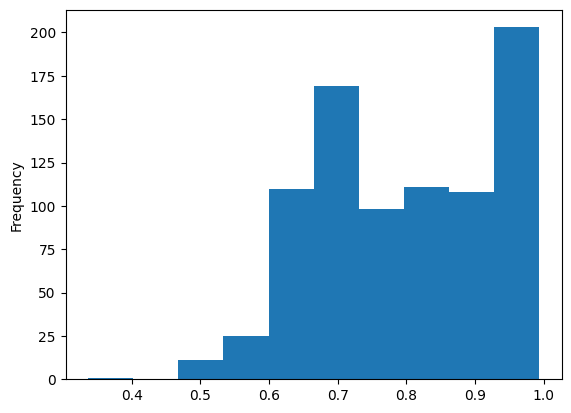

In [98]:
df2 = pd.DataFrame(y_score, columns=["score"])
df2['score'].plot(kind='hist')

In [99]:
#THRESHOLD
model_performance = pd.DataFrame({"accuracy":[],"precision":[],"recall":[],"f1":[],"cut":[]})
for x in range(0,100):
    pred = [1 if y > (x*0.01) else 0 for y in y_score]
    acc = (y_test == pred).mean()
    prec = sum(np.multiply(y_test,pred)) / (sum( np.multiply([ 1 - pr for pr in y_test], pred)) + sum(np.multiply(y_test,pred)))
    reca = sum(np.multiply(y_test,pred)) / (sum( np.multiply([ 1 - pr for pr in pred], y_test)) + sum(np.multiply(y_test,pred)))
    f_1 = (0.25) * prec * reca/ ((0.25*prec) + reca)
    model_performance = model_performance.append({
        "accuracy": acc,
        "precision": prec,
        "recall": reca,
        "f1": f_1,
        "cut": x * 0.01
    }, ignore_index=True)
    

threshold = model_performance.iloc[model_performance["f1"].idxmax()]['cut']
threshold

0.66

In [100]:
#threshold = 0.80

In [101]:
predConThres = [1 if y > threshold else 0 for y in y_score]
dt = pd.concat([y_test.reset_index().drop("index", axis=1), pd.Series(predConThres)], axis=1)
dt.head()

Default  0
0        1  0
1        0  1
2        1  1
3        1  0
4        1  1

In [102]:
#Partición de la data de train y test para testear.
Xt = X_test
Yt = y_test

Xt['pred'] = model.predict_proba(Xt)[:, 1]
Xt['y'] = Yt

ks = ks_2samp(Xt.loc[Xt.y==0,"pred"], Xt.loc[Xt.y==1,"pred"])[0]
ks

C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.33040098922451866

GINI = 0.42652358240593546, KS = 0.33040098922451866


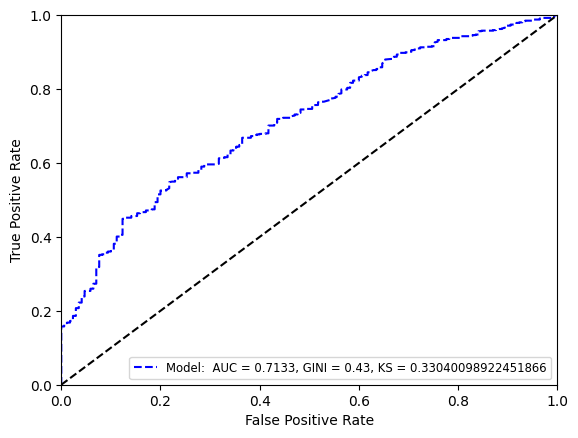

In [103]:
# %matplotlib inline

def plot_roc_curve(y, y_pred, gini, ks):
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure()
    plt.plot(fpr, tpr, 'b--', label='%s AUC = %0.4f, GINI = %0.2f, KS = %s' % ('Model: ', roc_auc, gini, ks))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0, fontsize='small')
    plt.show()
    
gini = 2 * roc_auc_score(y_test, y_score) - 1
#ks = stats.ks_2samp(dt[dt["Default"]==0][0], dt[dt["Default"]==1][0]).statistic
print('GINI = %s, KS = %s' % (gini, ks))
plot_roc_curve(y_test, y_score, gini, ks)

In [107]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample=1.0,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=2.4622198171652845, learning_rate=0.09175399398624959,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=499, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1.0, verbosity=1)

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predConThres)

array([[ 55, 115],
       [ 71, 595]], dtype=int64)

In [105]:
data1 = {'Variables':  X.columns,
        'Importancia': model.feature_importances_
        }

df = pd.DataFrame (data1, columns = ['Variables','Importancia'])

#ORDENO DATA
df.sort_values(by=['Importancia'], ascending=False)

Variables  Importancia
5                                            score     0.084396
8                                     ratio_i_spas     0.063306
35              DescripcionIndustria__CONTABILIDAD     0.036454
27     DescripcionIndustria__ACUICULTURAPESCADERIA     0.035463
6                                  max_dias_atraso     0.034620
20                                  Cargo__ABOGADO     0.033867
26                                    Cargo__OTROS     0.033609
30                 DescripcionIndustria__ALIMENTOS     0.032920
4                                antiguedad_empleo     0.032559
3                                             edad     0.030474
1                              TiempoRelacionBanco     0.029931
31    DescripcionIndustria__ARQUITECTURAYURBANISMO     0.028687
39                 DescripcionIndustria__MERCANCIA     0.028615
0                            cantidad_Dependientes     0.028242
62                            ciudad__SANMIGUELITO     0.027665
54                               provincia__PANAMA     0.027485
32       DescripcionIndustria__ASESORIAYASISTENCIA     0.027392
12         Descripcion_Nivel_Educacion__Secundaria     0.027349
7                                    ratio_i_sprom     0.027267
17                             Estadocivil__SINGLE     0.026975
2                                   IngresoMensual     0.026797
9                                   ratio_i_cuotas     0.023516
28            DescripcionIndustria__ADMINISTRACION     0.023151
18                                  Genero__FEMALE     0.022868
40                     DescripcionIndustria__OTROS     0.022437
55                          provincia__PANAMAOESTE     0.021996
57                                ciudad__ARRAIJAN     0.021955
15                            Estadocivil__MARRIED     0.021607
21                            Cargo__ADMINISTRADOR     0.020499
13     Descripcion_Nivel_Educacion__SinEscolaridad     0.019060
58                                   ciudad__DAVID     0.018854
24                                 Cargo__DIRECTOR     0.017057
59                              ciudad__LACHORRERA     0.014841
37                     DescripcionIndustria__LEGAL     0.014687
34              DescripcionIndustria__CONSTRUCCION     0.013400
50                                provincia__COCLE     0.000000
51                                provincia__COLON     0.000000
48                                    pais__PANAMA     0.000000
49                             provincia__CHIRIQUI     0.000000
61                                  ciudad__PANAMA     0.000000
52                              provincia__HERRERA     0.000000
53                                provincia__OTROS     0.000000
46       DescripcionIndustria__TRANSPORTETERRESTRE     0.000000
56                             provincia__VERAGUAS     0.000000
60                                   ciudad__OTROS     0.000000
47                                     pais__OTROS     0.000000
14      Descripcion_Nivel_Educacion__Universitario     0.000000
45   DescripcionIndustria__TECNOLOGIADEINFORMACION     0.000000
44     DescripcionIndustria__SERVICIODECONSULTORIA     0.000000
43    DescripcionIndustria__ROPACALZADOYACCESORIOS     0.000000
42    DescripcionIndustria__RESTAURANTESYSERVICIOS     0.000000
41       DescripcionIndustria__PUBLICIDADYMERCADEO     0.000000
36  DescripcionIndustria__ELECTRICIDADYELECTRONICA     0.000000
33          DescripcionIndustria__BELLEZAYESTETICA     0.000000
10           Descripcion_Nivel_Educacion__Maestria     0.000000
29      DescripcionIndustria__AGRICULTURAAGRONOMIA     0.000000
11              Descripcion_Nivel_Educacion__OTROS     0.000000
25                        Cargo__GERENTESUBGERENTE     0.000000
23                              Cargo__COMERCIANTE     0.000000
22                          Cargo__AGENTECOMERCIAL     0.000000
19                                    Genero__MALE     0.000000
16                              Estadocivil__OTHER     0.000000
38       

In [106]:
categorical_cols = columnas_categoricas

In [216]:
#EXPORTO RESULTADOS
with open('feature_headers.pkl','wb') as _:
    pickle.dump(X.columns, _)
    
with open('categorical_features.pkl','wb') as _:
    pickle.dump(categorical_cols, _)

with open('xgb.pkl','wb') as _:
    pickle.dump(model,_)

with open('threshold.pkl','wb') as _:
    pickle.dump(threshold,_)

In [217]:
df.sort_values(by=['Importancia'], ascending=False).to_csv('..src/feature_importances_and_performance/feature_importances.csv')